In [39]:
import nltk
import string
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from pdfminer.high_level import extract_text

In [34]:
!pip install nltk


   ---------------------------------------- 0.0/1.5 MB ? eta -:--:--
   ---------------------------------------- 1.5/1.5 MB 19.1 MB/s eta 0:00:00


In [38]:
!pip install pdfminer.six


  Using cached pdfminer_six-20250327-py3-none-any.whl.metadata (4.1 kB)
   ---------------------------------------- 0.0/5.6 MB ? eta -:--:--
   ------------------------ --------------- 3.4/5.6 MB 18.7 MB/s eta 0:00:01
   ---------------------------------------- 5.6/5.6 MB 17.2 MB/s eta 0:00:00
   ---------------------------------------- 0.0/3.2 MB ? eta -:--:--
   ---------------------------------------- 3.2/3.2 MB 17.3 MB/s eta 0:00:00


In [58]:
import re
import string

def preprocess_text(text, remove_stopwords=True):
    # Convert to lowercase
    text = text.lower()

    # Remove punctuation and digits
    text = re.sub(f"[{re.escape(string.punctuation)}0-9]", " ", text)

    # Tokenize using simple split
    tokens = text.split()

    # Remove stopwords manually if needed
    if remove_stopwords:
        stopwords = {
            'a', 'an', 'the', 'and', 'or', 'but', 'if', 'while', 'of', 'at',
            'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through',
            'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down',
            'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once',
            'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each',
            'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only',
            'own', 'same', 'so', 'than', 'too', 'very', 'can', 'will', 'just', 'don',
            'should', 'now'
        }
        tokens = [word for word in tokens if word not in stopwords]

    return tokens


In [59]:
resume_tokens = preprocess_text(resume_text_pdf)
jd_tokens = preprocess_text(jd_text)


In [60]:
print("Resume Tokens:", resume_tokens[:20])
print("JD Tokens:", jd_tokens[:20])


Resume Tokens: ['saurabh', 'gaikwad', 'linkedin', 'gaikwadsaurabh', 'gmail', 'com', 'github', 'experiences', 'data', 'analyst', 'bonace', 'engineers', 'aug', 'oct', '•', 'developed', 'automated', 'etl', 'pipelines', 'using']
JD Tokens: ['description', 'this', 'role', 'require', 'you', 'report', 'corporate', 'office', 'atlanta', 'ga', 'tempe', 'az', 'amazonâ€™s', 'transportation', 'execution', 'systems', 'team', 'is', 'seeking', 'transportation']


In [61]:
def jaccard_similarity(list1, list2):
    set1 = set(list1)
    set2 = set(list2)
    intersection = set1.intersection(set2)
    union = set1.union(set2)
    return len(intersection) / len(union)

similarity = jaccard_similarity(resume_tokens, jd_tokens)
print(f"Similarity Score: {similarity:.2f}")


Similarity Score: 0.07


In [62]:
def compare_resume_to_jd(resume_text, jd_text):
    resume_tokens = preprocess_text(resume_text)
    jd_tokens = preprocess_text(jd_text)
    
    # Similarity
    sim = jaccard_similarity(resume_tokens, jd_tokens)

    # Matching keywords
    common_words = set(resume_tokens).intersection(set(jd_tokens))
    
    return {
        "similarity": sim,
        "common_words": list(common_words),
        "resume_token_count": len(resume_tokens),
        "jd_token_count": len(jd_tokens),
        "resume_only": list(set(resume_tokens) - set(jd_tokens)),
        "jd_only": list(set(jd_tokens) - set(resume_tokens)),
    }


In [63]:
results = compare_resume_to_jd(resume_text_pdf, jd_text)
print("Similarity Score:", results["similarity"])
print("Common Words:", results["common_words"])


Similarity Score: 0.06510416666666667
Common Words: ['managing', 'that', 'report', 'management', 'data', 'improvement', 'continuous', 'team', 'excel', 'drive', 'experience', 's', 'performance', 'maintain', 'office', 'improvements', 'key', 'bachelor', 'process', 'analyst', 'operations', 'identifying', 'high', 'sql', 'driven']


In [64]:
missing_keywords = set(results["jd_only"])
print("🔍 Keywords missing from resume:", sorted(missing_keywords))


🔍 Keywords missing from resume: ['amazon', 'amazonâ€™s', 'american', 'array', 'atlanta', 'az', 'basic', 'bright', 'center', 'centers', 'chain', 'charts', 'cleansing', 'configure', 'corporate', 'creates', 'criteria', 'decisions', 'degree', 'deliver', 'description', 'design', 'develop', 'develops', 'diploma', 'documentation', 'driving', 'e', 'encompasses', 'equivalent', 'etc', 'etls', 'exceptionally', 'execution', 'formulas', 'fulfillment', 'g', 'ga', 'identifies', 'improve', 'innovative', 'inputs', 'integrates', 'intermediate', 'internal', 'is', 'job', 'join', 'knowledge', 'large', 'lead', 'level', 'locations', 'logical', 'logistics', 'lookups', 'multiple', 'needs', 'nested', 'network', 'north', 'our', 'packages', 'party', 'people', 'pivot', 'preferred', 'problem', 'processes', 'program', 'programs', 'qualifications', 'reduce', 'reference', 'require', 'responsibilities', 'role', 'scale', 'school', 'seeking', 'sets', 'shipments', 'shipping', 'solutions', 'solve', 'streamline', 'supply', 

In [68]:
print("📊 Resume–JD Match Report")
print("-" * 30)
print(f"✅ Similarity Score: {round(results['similarity'] * 100, 2)}%")
print(f"✅ Matched Keywords: {', '.join(results['common_words'])}")
print(f"❌ Missing from Resume: {', '.join(sorted(results['jd_only']))}")


📊 Resume–JD Match Report
------------------------------
✅ Similarity Score: 6.51%
✅ Matched Keywords: managing, that, report, management, data, improvement, continuous, team, excel, drive, experience, s, performance, maintain, office, improvements, key, bachelor, process, analyst, operations, identifying, high, sql, driven
❌ Missing from Resume: amazon, amazonâ€™s, american, array, atlanta, az, basic, bright, center, centers, chain, charts, cleansing, configure, corporate, creates, criteria, decisions, degree, deliver, description, design, develop, develops, diploma, documentation, driving, e, encompasses, equivalent, etc, etls, exceptionally, execution, formulas, fulfillment, g, ga, identifies, improve, innovative, inputs, integrates, intermediate, internal, is, job, join, knowledge, large, lead, level, locations, logical, logistics, lookups, multiple, needs, nested, network, north, our, packages, party, people, pivot, preferred, problem, processes, program, programs, qualifications, 

In [70]:
pip install scikit-learn


   ---------------------------------------- 0.0/11.1 MB ? eta -:--:--
   ------------- -------------------------- 3.7/11.1 MB 20.3 MB/s eta 0:00:01
   ----------------------------- ---------- 8.1/11.1 MB 20.9 MB/s eta 0:00:01
   ---------------------------------------- 11.1/11.1 MB 20.6 MB/s eta 0:00:00
   ---------------------------------------- 0.0/41.0 MB ? eta -:--:--
   ---- ----------------------------------- 4.5/41.0 MB 21.3 MB/s eta 0:00:02
   --------- ------------------------------ 10.0/41.0 MB 24.4 MB/s eta 0:00:02
   -------------- ------------------------- 14.7/41.0 MB 23.3 MB/s eta 0:00:02
   ------------------ --------------------- 19.4/41.0 MB 23.4 MB/s eta 0:00:01
   ---------------------- ----------------- 23.1/41.0 MB 23.2 MB/s eta 0:00:01
   ------------------------- -------------- 26.5/41.0 MB 21.3 MB/s eta 0:00:01
   ------------------------------ --------- 30.9/41.0 MB 21.4 MB/s eta 0:00:01
   ---------------------------------- ----- 35.7/41.0 MB 21.6 MB/s eta 0:

In [72]:
import nltk
nltk.download('punkt')


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\gaikw\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [75]:
nltk.download('punkt')
nltk.download('punkt_tab')


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\gaikw\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\gaikw\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt_tab.zip.


True

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\gaikw\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


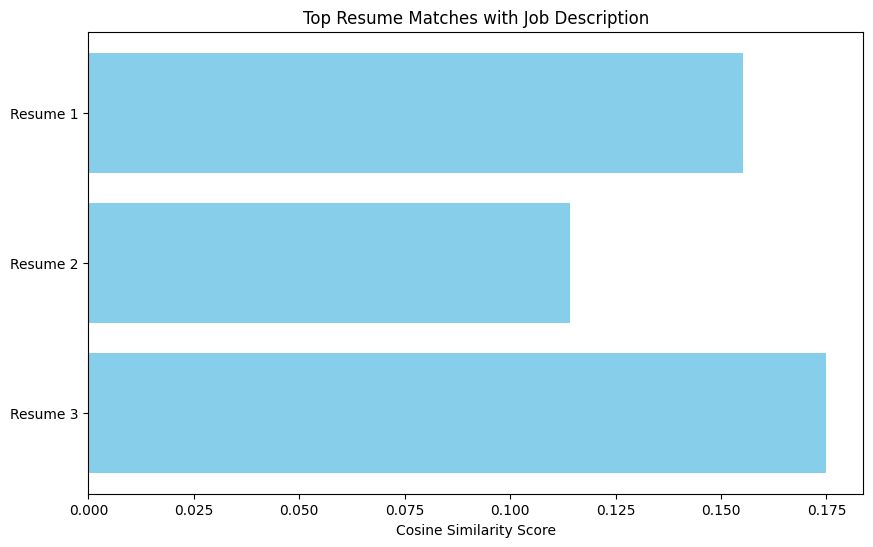

Results saved to similarity_scores.csv


In [76]:
import os
import nltk
import string
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

# Make sure necessary NLTK resources are downloaded
nltk.download('punkt')

# Function to preprocess text
def preprocess_text(text, remove_stopwords=True):
    # Tokenize text
    tokens = nltk.word_tokenize(text.lower())
    # Remove punctuation and digits
    tokens = [word for word in tokens if word not in string.punctuation and not word.isdigit()]
    # Remove stopwords if specified
    if remove_stopwords:
        stopwords = nltk.corpus.stopwords.words('english')
        tokens = [word for word in tokens if word not in stopwords]
    return ' '.join(tokens)

# Function to calculate cosine similarity between resumes and job descriptions
def calculate_similarity(resume_texts, jd_text):
    # Preprocess all texts
    processed_resumes = [preprocess_text(resume) for resume in resume_texts]
    processed_jd = preprocess_text(jd_text)
    
    # Combine the JD with resumes for vectorization
    all_texts = processed_resumes + [processed_jd]
    
    # Vectorize the texts using TF-IDF
    vectorizer = TfidfVectorizer()
    tfidf_matrix = vectorizer.fit_transform(all_texts)
    
    # Calculate cosine similarity
    cosine_similarities = cosine_similarity(tfidf_matrix[-1], tfidf_matrix[:-1])
    
    # Return similarity scores
    return cosine_similarities.flatten()

# Function to generate a bar chart of similarity scores
def plot_similarity(scores, resume_names):
    plt.figure(figsize=(10, 6))
    plt.barh(resume_names, scores, color='skyblue')
    plt.xlabel('Cosine Similarity Score')
    plt.title('Top Resume Matches with Job Description')
    plt.gca().invert_yaxis()  # Invert y-axis for top to bottom order
    plt.show()

# Function to save results to a CSV
def save_to_csv(resume_names, scores, filename="similarity_scores.csv"):
    df = pd.DataFrame({
        'Resume': resume_names,
        'Similarity Score': scores
    })
    df.to_csv(filename, index=False)
    print(f"Results saved to {filename}")

# Example data: List of resumes and a job description
resume_texts = [
    "Saurabh Gaikwad, Data Analyst at Bonace Engineers, developed ETL pipelines using Python, SQL, and Pandas.",
    "John Doe, Data Scientist with experience in ML and data visualization, proficient in Python, R, SQL.",
    "Alice Smith, Business Analyst, specializing in process optimization and data analysis in operations."
]
jd_text = "Amazon is looking for a Data Analyst to manage data pipelines, perform analysis, and drive operational improvements."

# Calculate similarity scores
similarity_scores = calculate_similarity(resume_texts, jd_text)

# Plot similarity scores
plot_similarity(similarity_scores, ["Resume 1", "Resume 2", "Resume 3"])

# Save results to CSV
save_to_csv(["Resume 1", "Resume 2", "Resume 3"], similarity_scores)
